<a href="https://colab.research.google.com/github/haider-sattar/Housing-price-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dropout

Load dataset

In [2]:
housing_data=fetch_california_housing()


In [3]:
print(type(housing_data))
features=housing_data.data
target=housing_data.target
df=pd.DataFrame(features,columns=housing_data.feature_names)
df['target']=pd.Series(target)
# df.head()
df.info()


<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
X=df.drop('target', axis=1).values
y=df['target'].values
scalar_x=StandardScaler()
X_scaled=scalar_x.fit_transform(X)
X_train_full,X_test_full, y_train_full,y_test_full=train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train,X_valid, y_train,y_valid=train_test_split(X_train_full,y_train_full, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(13209, 8) (13209,)
(3303, 8) (3303,)


In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=X_train.shape[1:],  kernel_initializer='he_normal',),
    tf.keras.layers.Dense(128, activation='relu',  kernel_initializer='he_normal',),
    tf.keras.layers.Dense(64, activation='relu',  kernel_initializer='he_normal',),
    tf.keras.layers.Dense(32, activation='relu',  kernel_initializer='he_normal',),
    tf.keras.layers.Dense(1)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from keras import metrics

# Adam optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile model
model.compile(
    loss='mean_squared_error',
    optimizer=optimizer,
    metrics=[
        'mae',                           # Mean Absolute Error
        metrics.RootMeanSquaredError(),  # RMSE
        'mse',                           # MSE
    ],
)

# Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,               # stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True  # revert to best model
)



history = model.fit(
    X_train,
    y_train,
    epochs=70,
    validation_data=(X_valid, y_valid),
    batch_size=16,
    callbacks=[early_stop]
)


Epoch 1/70
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9297 - mae: 0.6230 - mse: 0.9297 - root_mean_squared_error: 0.9557 - val_loss: 1.1709 - val_mae: 0.5045 - val_mse: 1.1709 - val_root_mean_squared_error: 1.0821
Epoch 2/70
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5251 - mae: 0.4754 - mse: 0.5251 - root_mean_squared_error: 0.7215 - val_loss: 2.4166 - val_mae: 0.4680 - val_mse: 2.4166 - val_root_mean_squared_error: 1.5545
Epoch 3/70
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5239 - mae: 0.4343 - mse: 0.5239 - root_mean_squared_error: 0.7179 - val_loss: 3.5078 - val_mae: 0.5095 - val_mse: 3.5078 - val_root_mean_squared_error: 1.8729
Epoch 4/70
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6887 - mae: 0.4212 - mse: 0.6887 - root_mean_squared_error: 0.8164 - val_loss: 2.1125 - val_mae: 0.4560 - val_mse: 2.1125 - val_root_mean_squared_error: 1.4535
Epoch 5/70
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4150 - mae: 0.4038 - mse: 0.4150 - root_mean_squar

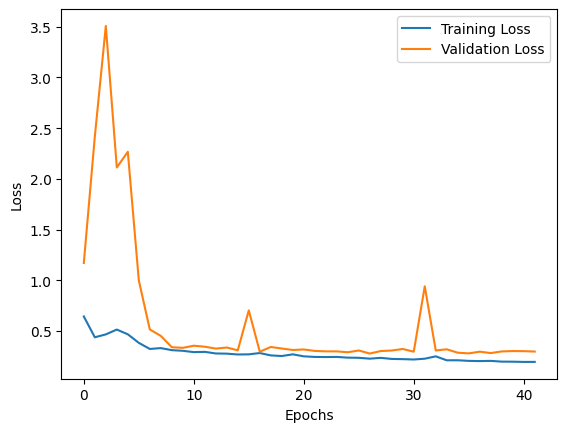

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


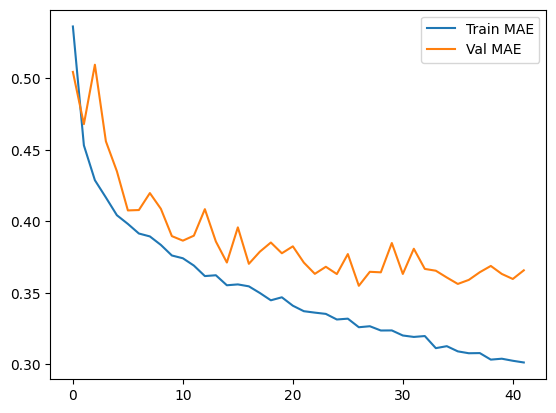

In [20]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.show()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2652 - mae: 0.3507 - mse: 0.2652 - root_mean_squared_error: 0.5147
MODEL EVALUATION:
Test Loss (MSE): 0.2710
Test MAE: 0.3515
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


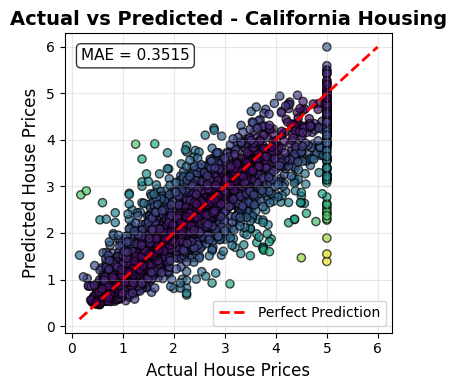

In [21]:
test_loss, test_mae, test_mse, test_rmse = model.evaluate(X_test_full, y_test_full, verbose=1)
print("=" * 40)
print("MODEL EVALUATION:")
print("=" * 40)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print("=" * 40)

y_pred = model.predict(X_test_full)

# Basic scatter plot with slight improvements
plt.figure(figsize=(4, 4))  # Slightly bigger for report

# Make sure they're 1D arrays
y_test_flat = y_test_full.flatten()
y_pred_flat = y_pred.flatten()

errors = np.abs(y_test_flat - y_pred_flat)

plt.scatter(
    y_test_flat, y_pred_flat,
    c=errors,            # color by error
    cmap='viridis',      # change color style
    alpha=0.7,
    s=35,
    edgecolors='k'
)
# Perfect prediction line
min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val],
         'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual House Prices', fontsize=12)
plt.ylabel('Predicted House Prices', fontsize=12)
plt.title('Actual vs Predicted - California Housing', fontsize=14, fontweight='bold')

# Add MAE value to plot
from sklearn.metrics import mean_absolute_error
mae_calculated = mean_absolute_error(y_test_flat, y_pred_flat)
plt.text(0.05, 0.95, f'MAE = {mae_calculated:.4f}',
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [22]:
# Add this after your plots for clear comparison
print("="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"{'Metric':<20} {'Training':<12} {'Validation':<12} {'Test':<12}")
print("-"*60)
print(f"{'Final Loss (MSE)':<20} {history.history['loss'][-1]:<12.4f} {history.history['val_loss'][-1]:<12.4f} {test_loss:<12.4f}")
print(f"{'Final MAE':<20} {history.history['mae'][-1]:<12.4f} {history.history['val_mae'][-1]:<12.4f} {test_mae:<12.4f}")
print("="*60)



FINAL MODEL PERFORMANCE SUMMARY
Metric               Training     Validation   Test        
------------------------------------------------------------
Final Loss (MSE)     0.1952       0.2971       0.2710      
Final MAE            0.3014       0.3658       0.3515      
